In [1]:
import pandas as pd

In [2]:
dt = pd.read_csv(r'C:\Users\Rishabh\Downloads\wines.csv')

In [3]:
dt

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
y = pd.get_dummies(dt['Class'])
y

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [5]:
X = dt.iloc[:,1:]
#or X = dt.drop('Class',axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

#creates a model for feature selection
#alpha value used to tell the dataset is small,default is 1.0
sel = SelectFromModel(Lasso(alpha = 0.0001))
sel.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [8]:
#displays output if columns are important or not
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [9]:
import seaborn as sns

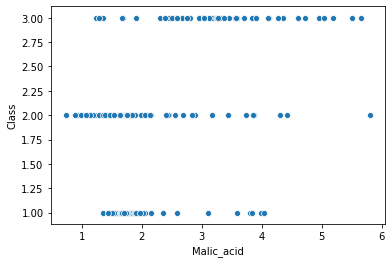

In [10]:
sns.scatterplot(x='Malic_acid' , y='Class' , data=dt)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [12]:
model = Sequential()

In [13]:
X.shape

(178, 13)

In [14]:
y.shape

(178, 3)

In [15]:
model.add(Dense(units=6 , input_shape=(13,), 
                activation='relu', 
                kernel_initializer='he_normal' ))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 84        
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(Dense(units=9, 
                activation='relu', 
                kernel_initializer='he_normal' ))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 63        
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.add(Dense(units=15, 
                activation='relu', 
                kernel_initializer='he_normal' ))

In [20]:
model.add(Dense(units=20, 
                activation='relu', 
                kernel_initializer='he_normal' ))
model.add(Dense(units=9, 
                activation='relu', 
                kernel_initializer='he_normal' ))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 63        
_________________________________________________________________
dense_3 (Dense)              (None, 15)                150       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 189       
Total params: 806
Trainable params: 806
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.add(Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 63        
_________________________________________________________________
dense_3 (Dense)              (None, 15)                150       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 189       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 30        
Total params: 836
Trainable params: 836
Non-trainable params: 0
________________________________________________________

In [22]:
model.compile(optimizer='adam',  
              loss='categorical_crossentropy',
             metrics=['accuracy']
             )

In [23]:
model.fit(X_train, y_train, verbose = 2, validation_data = (X_test, y_test),epochs=100)

Train on 142 samples, validate on 36 samples
Epoch 1/100
 - 0s - loss: 448.7647 - accuracy: 0.2817 - val_loss: 391.1894 - val_accuracy: 0.2222
Epoch 2/100
 - 0s - loss: 318.0108 - accuracy: 0.2817 - val_loss: 257.9267 - val_accuracy: 0.2222
Epoch 3/100
 - 0s - loss: 203.4320 - accuracy: 0.2817 - val_loss: 130.1290 - val_accuracy: 0.2222
Epoch 4/100
 - 0s - loss: 112.6243 - accuracy: 0.1761 - val_loss: 92.2639 - val_accuracy: 0.3889
Epoch 5/100
 - 0s - loss: 102.7539 - accuracy: 0.3169 - val_loss: 89.3847 - val_accuracy: 0.3889
Epoch 6/100
 - 0s - loss: 99.1612 - accuracy: 0.3169 - val_loss: 81.2761 - val_accuracy: 0.3889
Epoch 7/100
 - 0s - loss: 88.5547 - accuracy: 0.3169 - val_loss: 70.6870 - val_accuracy: 0.3889
Epoch 8/100
 - 0s - loss: 76.6522 - accuracy: 0.3169 - val_loss: 59.3783 - val_accuracy: 0.3889
Epoch 9/100
 - 0s - loss: 63.3693 - accuracy: 0.3169 - val_loss: 47.8162 - val_accuracy: 0.3889
Epoch 10/100
 - 0s - loss: 50.0258 - accuracy: 0.3169 - val_loss: 36.9490 - val_acc

Epoch 87/100
 - 0s - loss: 0.5143 - accuracy: 0.8310 - val_loss: 0.3725 - val_accuracy: 0.9444
Epoch 88/100
 - 0s - loss: 0.4943 - accuracy: 0.8380 - val_loss: 0.6175 - val_accuracy: 0.7500
Epoch 89/100
 - 0s - loss: 0.6000 - accuracy: 0.7183 - val_loss: 0.4723 - val_accuracy: 0.7778
Epoch 90/100
 - 0s - loss: 0.5651 - accuracy: 0.7465 - val_loss: 0.5140 - val_accuracy: 0.7222
Epoch 91/100
 - 0s - loss: 0.6580 - accuracy: 0.6901 - val_loss: 0.3802 - val_accuracy: 0.9444
Epoch 92/100
 - 0s - loss: 0.5119 - accuracy: 0.7887 - val_loss: 0.4181 - val_accuracy: 0.8889
Epoch 93/100
 - 0s - loss: 0.4778 - accuracy: 0.8169 - val_loss: 0.5093 - val_accuracy: 0.7500
Epoch 94/100
 - 0s - loss: 0.5275 - accuracy: 0.7676 - val_loss: 0.3645 - val_accuracy: 0.9444
Epoch 95/100
 - 0s - loss: 0.5653 - accuracy: 0.7465 - val_loss: 0.5143 - val_accuracy: 0.8056
Epoch 96/100
 - 0s - loss: 0.5690 - accuracy: 0.7465 - val_loss: 0.5692 - val_accuracy: 0.7778
Epoch 97/100
 - 0s - loss: 0.7084 - accuracy: 0.72

In [26]:
model.save('wine_model.hd5')

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([[3.7646550e-01, 4.7935879e-01, 1.4417580e-01],
       [7.5634235e-01, 1.7141519e-01, 7.2242543e-02],
       [9.0996012e-02, 2.9263821e-01, 6.1636579e-01],
       [9.6291828e-01, 3.6582969e-02, 4.9875304e-04],
       [1.9786602e-01, 5.3444415e-01, 2.6768973e-01],
       [9.0563041e-01, 9.0757012e-02, 3.6125011e-03],
       [1.6566373e-01, 5.6023228e-01, 2.7410403e-01],
       [1.2423085e-01, 1.8432269e-01, 6.9144648e-01],
       [2.8569812e-01, 6.2013030e-01, 9.4171561e-02],
       [3.7935066e-01, 2.3258698e-01, 3.8806239e-01],
       [5.5064976e-01, 3.7734854e-01, 7.2001748e-02],
       [2.3000300e-02, 2.6497746e-01, 7.1202224e-01],
       [8.6336946e-01, 1.2876189e-01, 7.8686811e-03],
       [9.4648026e-02, 5.4129797e-01, 3.6405405e-01],
       [9.6495384e-01, 3.3876281e-02, 1.1698439e-03],
       [5.9733566e-02, 9.0147829e-01, 3.8788203e-02],
       [9.7165853e-02, 7.0728606e-01, 1.9554801e-01],
       [3.0795330e-01, 5.0091881e-01, 1.9112794e-01],
       [8.6153388e-01, 1.319